In [59]:
# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'input-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2789271%2F4816636%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T124014Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D622c0a53e86829dd59916040b3359df62ba2ffc06119885ac190648b2a1910533c8075a7fb59c2c8bb5c4b138e3fddc8feaaa9aa6be23ac76c3b449289420e012b0553a75a83dad7ffce089355d71c6699833902479ffdd34428f7411b968c6bab0c81e9ca5319d6da6136eeefcbb40f43e78e7517798b1b21bf1b55bd95d645af93e6c913ed98270fb769715d7e427e2e626d730834743c2a5e42d6fc2f47cc0d55e838b6050f7a4836115ea1c13507259c56f3d21331f926215a686cb77e724f386722092751fdae54fe1441d8b31445f54bcecb289ca70f724a01175074c3a8f47f3f582813f41ee0c9c725f103e1a1240f2ae6eae312cabb92c30deebe90'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [60]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [61]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# import os
# for dirname, _, filenames in os.walk('/kaggle/input-data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [62]:
import pandas as pd


data=pd.read_csv('/content/Stress-Lysis.csv')
data.head()  # displays the first five rows of the dataframe

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [63]:
# Analyzing the Data

In [64]:
data.shape  # returns a tuple of array dimension that specifies the number of rows and columns

(2001, 4)

In [65]:
data.info()  # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [66]:
#data cleaning


In [67]:
data['Stress_Level'].unique()


array([1, 2, 0])

In [68]:
data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [69]:
data.duplicated().sum()

0

In [70]:
# EDA - EXPLORATORY DATA ANALYSIS

In [71]:
# 1.Univariate Non-Graphical

In [72]:
#Check for outliers. If present try to handle them.

In [73]:
data.skew()

Humidity        1.179993e-18
Temperature    -1.297993e-17
Step_count     -6.998237e-03
Stress_Level   -1.811032e-01
dtype: float64

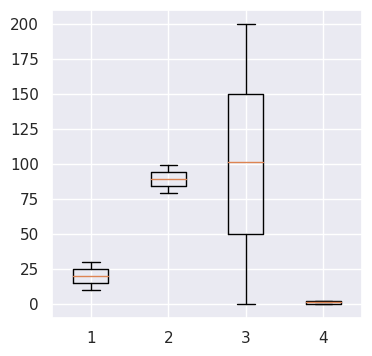

In [74]:
# Import the necessary module
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(4, 4))
plt.boxplot(data)
plt.show()

In [75]:
# Logarithmic Transformation
import numpy as np
hum_log = np.log(data['Humidity'])
h = round(hum_log.skew(),10)
print(h)

-0.3790364332


In [76]:
# SquareRoot Transformation
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()
t = round(temp_sqrt.skew(),10)
print(t)

-0.0390881104


In [77]:
quantile1=data["Step_count"].quantile(0.25)
quantile2=data["Step_count"].quantile(0.75)

In [78]:
quantile1

50.0

In [79]:
quantile2

150.0

In [80]:
data["Step_count"]=np.where(data["Step_count"]<quantile1,quantile1,data["Step_count"])
data["Step_count"]=np.where(data["Step_count"]>quantile2,quantile2,data["Step_count"])

In [81]:
s = round(data['Step_count'].skew(),10)
print(s)

-0.0094975784


In [82]:
# SquareRoot Transformation
stress_sqrt = np.sqrt(data['Stress_Level'])
sl = round(stress_sqrt.skew(),10)
print(sl)

-0.7944935599


In [83]:
 #  2.Univariate Graphical

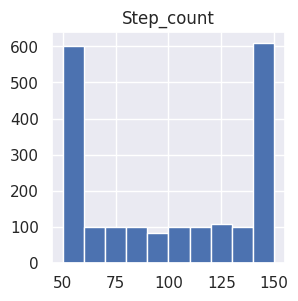

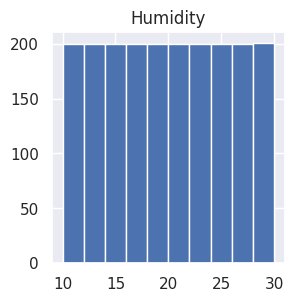

In [84]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<Axes: xlabel='Stress_Level', ylabel='Count'>

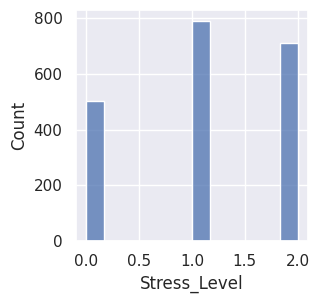

In [85]:
# histplot (categorical)
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

In [86]:
#    3.Multivariate Non-Graphical

In [87]:
correlation = data.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.902053,0.936036
Temperature,1.000000,1.000000,0.902053,0.936036
Step_count,0.902053,0.902053,1.000000,0.859096
Stress_Level,0.936036,0.936036,0.859096,1.000000


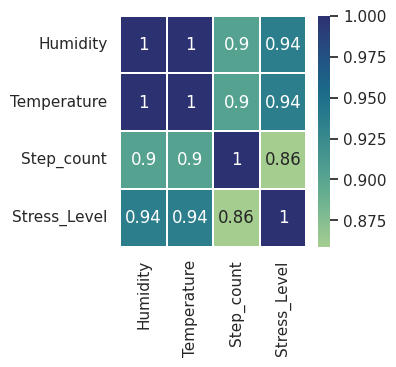

In [88]:
plt.figure(figsize=(3,3))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

In [89]:
 # 4.Multivariate Graphical

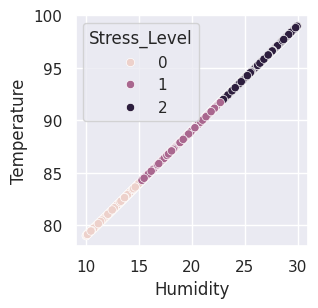

In [90]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

In [91]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from joblib import dump
from contextlib import ExitStack

# # Function to download and extract data
# def download_and_extract_data(data_source_mapping, kaggle_input_path):
#     CHUNK_SIZE = 40960
#     for data_source_mapping in data_source_mapping.split(','):
#         directory, download_url_encoded = data_source_mapping.split(':')
#         download_url = unquote(download_url_encoded)
#         filename = urlparse(download_url).path
#         destination_path = os.path.join(kaggle_input_path, directory)
#         try:
#             with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#                 total_length = fileres.headers['content-length']
#                 print(f'Downloading {directory}, {total_length} bytes compressed')
#                 dl = 0
#                 data = fileres.read(CHUNK_SIZE)
#                 while len(data) > 0:
#                     dl += len(data)
#                     tfile.write(data)
#                     done = int(50 * dl / int(total_length))
#                     sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                     sys.stdout.flush()
#                     data = fileres.read(CHUNK_SIZE)
#                 if filename.endswith('.zip'):
#                     with ZipFile(tfile) as zfile:
#                         zfile.extractall(destination_path)
#                 else:
#                     with tarfile.open(tfile.name) as tarfile:
#                         tarfile.extractall(destination_path)
#                 print(f'\nDownloaded and uncompressed: {directory}')
#         except HTTPError as e:
#             print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#             continue
#         except OSError as e:
#             print(f'Failed to load {download_url} to path {destination_path}')
#             continue
#     print('Data source import complete.')

In [92]:
# import os
# import pickle
# import random

# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# def load_data(file_path):
#     """Load the data from the given file path."""
#     data = pd.read_csv(file_path)
#     return data

# def evaluate_models(X_train, y_train, X_test, y_test, models):
#     """Evaluate the given models on the training and testing sets."""
#     model_scores = {}
#     for model_name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         score = accuracy_score(y_test, y_pred)
#         model_scores[model_name] = score
#     return model_scores

# if __name__ == '__main__':
#     # Load the data
#     file_path = '/content/Stress-Lysis.csv'
#     data = load_data(file_path)

#     # Separate features and target
#     X = data.drop(['Stress_Level'], axis=1)
#     y = data['Stress_Level']

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Standardize features by removing the mean and scaling to unit variance
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Initialize models
#     models = {
#         'Logistic Regression': LogisticRegression(C=1.0, random_state=2),
#         'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
#         'SVM': SVC(kernel='linear', random_state=0)
#     }

#     # Evaluate models
#     model_scores = evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test, models)

#     # Print the model scores
#     print("Model Scores:")
#     for model_name, score in model_scores.items():
#         print(f"{model_name}: {score}")

#     # Save the trained models and scaler
#     output_dir = 'output'
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     output_file = os.path.join(output_dir, 'models.pkl')
#     with open(output_file, 'wb') as f:
#         pickle.dump(models, f)
#     output_file = os.path.join(output_dir, 'scaler.pkl')
#     with open(output_file, 'wb') as f:
#         pickle.dump(scaler, f)

Model Scores:
Logistic Regression: 1.0
Random Forest: 1.0
SVM: 1.0


In [118]:
from sklearn.model_selection import train_test_split
X=data.drop(['Stress_Level'],axis=1)
y=data['Stress_Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 3)
y_train shape: (1600,)
X_test shape: (401, 3)
y_test shape: (401,)


In [94]:
#  LOGISTIC REGRESSION

In [119]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=1.0,random_state=2)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [120]:
filename = 'logistic_model.sav'
pickle.dump(regressor,open(filename,'wb'))

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]


In [122]:
print(accuracy_score(y_test,prediction))

1.0


In [123]:
# RANDOM FOREST CLASSIFICATION

In [124]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]


In [101]:
filename = 'random_forest_model.sav'
pickle.dump(model,open(filename,'wb'))
print(accuracy_score(y_test,prediction))

1.0


In [102]:
#  SUPPORT VECTOR MACHINE

In [129]:
from sklearn.preprocessing import StandardScaler
standardscalar = StandardScaler()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_train)

In [130]:
filename = 'stress_scaler.sav'
pickle.dump(standardscalar,open(filename,'wb'))

In [104]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [105]:
#   DEPLOYMENT

In [106]:
import pickle

In [107]:
filename = 'svm_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [108]:
# LOADING THE TRAINED MODEL

In [109]:
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Download the stress_trained.sav model

In [110]:
# Trying to install streamlit
!pip install -q streamlit

In [117]:
import numpy as np
import pickle

# Load the models
random_forest_model = pickle.load(open('random_forest_model.sav', 'rb'))
svm_model = pickle.load(open('svm_model.sav', 'rb'))
logistic_model = pickle.load(open('logistic_model.sav', 'rb'))

def main(input_data):
    print('STRESS LEVEL PREDICTION')
    print()

    try:
        # Extract input features
        input_data = np.array(input_data)

        # Check if input data falls within valid ranges
        if not (0 <= input_data[0] <= 100 and 0 <= input_data[1] <= 100 and 0 <= input_data[2] <= 10000):
            print("Invalid input data. Please ensure all values are within valid ranges.")
            return

        # Scale the input data
        scaled_input = scaler.transform([input_data])

        # Make predictions using Random Forest
        rf_prediction = random_forest_model.predict(scaled_input)
        print("Random Forest Prediction:", rf_prediction)

        # Make predictions using SVM
        svm_prediction = svm_model.predict(scaled_input)
        print("SVM Prediction:", svm_prediction)

        # Make predictions using Logistic Regression
        logistic_prediction = logistic_model.predict(scaled_input)
        print("Logistic Regression Prediction:", logistic_prediction)

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    # Test input data
    input_data = [26.85, 95.85, 169]  # Example data point

    # Call main() with the test input data
    main(input_data)


STRESS LEVEL PREDICTION

Random Forest Prediction: [0]
SVM Prediction: [1]
Logistic Regression Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [131]:
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the scaler
scaler = pickle.load(open('stress_scaler.sav', 'rb'))
# Load the trained models
logistic_model = pickle.load(open('logistic_model.sav', 'rb'))
random_forest_model = pickle.load(open('random_forest_model.sav', 'rb'))
svm_model = pickle.load(open('svm_model.sav', 'rb'))

# Preprocess input data with the scaler
input_data_scaled = scaler.transform([input_data])

# Make predictions using the models
logistic_prediction = logistic_model.predict(input_data_scaled)
random_forest_prediction = random_forest_model.predict(input_data_scaled)
svm_prediction = svm_model.predict(input_data_scaled)

# Print predictions
print("Logistic Regression Prediction:", logistic_prediction)
print("Random Forest Prediction:", random_forest_prediction)
print("SVM Prediction:", svm_prediction)

# Load the trained model
loaded_model = pickle.load(open('stress_trained.sav', 'rb'))

# Load the scaler used during training
scaler = pickle.load(open('stress_scaler.sav', 'rb'))

def stresslevel_prediction(input_data):
    # Scale the input features
    scaled_input = scaler.transform(input_data)

    # Make prediction
    prediction_prob = loaded_model.predict_proba(scaled_input)
    low_stress_prob, medium_stress_prob, high_stress_prob = prediction_prob[:, 0], prediction_prob[:, 1], prediction_prob[:, 2]

    # Return the predicted stress levels
    return low_stress_prob, medium_stress_prob, high_stress_prob

def main():
    st.title('STRESS LEVEL PREDICTION WEB APP')

    uploaded_file = st.file_uploader("Upload Excel file", type=['xlsx'])

    if uploaded_file is not None:
        try:
            # Read the uploaded Excel file
            data = pd.read_excel(uploaded_file)

            # Extract input features
            input_data = data[['Humidity', 'Temperature', 'Step_count']].values

            # Check if input data falls within valid ranges
            valid_range_mask = np.all((input_data >= 0) & (input_data <= [100, 100, 10000]), axis=1)
            invalid_data_indices = np.where(~valid_range_mask)[0]

            if invalid_data_indices.size > 0:
                st.warning(f"Invalid input data at row(s): {', '.join(map(str, invalid_data_indices + 2))}. Please ensure all values are within valid ranges.")
            else:
                # Scale the input data
                scaled_input = scaler.transform(input_data)

                # Make predictions
                low_stress_prob, medium_stress_prob, high_stress_prob = stresslevel_prediction(scaled_input)

                # Display the results
                result_df = pd.DataFrame({
                    'Low Stress Probability': low_stress_prob,
                    'Medium Stress Probability': medium_stress_prob,
                    'High Stress Probability': high_stress_prob
                })
                st.write(result_df)

        except Exception as e:
            st.error(f"An error occurred: {e}")

if __name__ == '__main__':
    main()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
2024-05-03 15:19:10.744 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


Logistic Regression Prediction: [1]
Random Forest Prediction: [1]
SVM Prediction: [2]


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.28.213.183:8501

